[Index](Index.ipynb) - [Back](Widget List.ipynb) - [Next](Widget Styling.ipynb)

# Widget Events

## Special events

In [1]:
from __future__ import print_function

The `Button` is not used to represent a data type.  Instead the button widget is used to handle mouse clicks.  The `on_click` method of the `Button` can be used to register function to be called when the button is clicked.  The doc string of the `on_click` can be seen below.

In [2]:
import ipywidgets as widgets
print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        


### Example

Since button clicks are stateless, they are transmitted from the front-end to the back-end using custom messages.  By using the `on_click` method, a button that prints a message when it has been clicked is shown below.

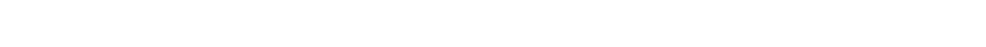

In [3]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

### on_submit

The `Text` widget also has a special `on_submit` event.  The `on_submit` event fires when the user hits return.

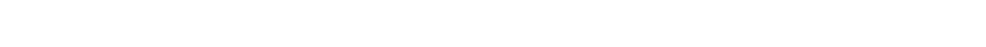

In [4]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

## Traitlet events

Widget properties are IPython traitlets and traitlets are eventful.  To handle  changes, the `observe` method of the widget can be used to register a callback.  The doc string for `observe` can be seen below.

In [5]:
print(widgets.Widget.observe.__doc__)

Setup a handler to be called when a trait changes.

        This is used to setup dynamic notifications of trait changes.

        Parameters
        ----------
        handler : callable
            A callable that is called when a trait changes. Its
            signature can be ``handler()`` or ``handler(change)``, where change
            is a dictionary. The change dictionary at least holds a 'type' key.
            * ``type``: the type of notification.
            Other keys may be passed depending on the value of 'type'. In the
            case where type is 'change', we also have the following keys:
            * ``owner`` : the HasTraits instance
            * ``old`` : the old value of the modified trait attribute
            * ``new`` : the new value of the modified trait attribute
            * ``name`` : the name of the modified trait attribute.
        names : list, str, All
            If names is All, the handler will apply to all traits.  If a list
            of str, h

### Signatures

Mentioned in the doc string, the callback registered must have the signature `handler(change)` where `change` is a dictionary holding the information about the change. 

Using this method, an example of how to output an `IntSlider`'s value as it is changed can be seen below.

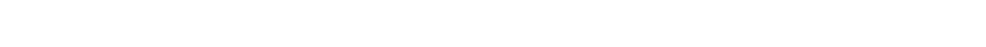

1
2
3
4
7
10
12
22
25
34
36
42
43
48
57
58
59
61


In [6]:
int_range = widgets.IntSlider()
display(int_range)

def on_value_change(change):
    print(change['new'])

int_range.observe(on_value_change, names='value')

# Linking Widgets

Often, you may want to simply link widget attributes together. Synchronization of attributes can be done in a simpler way than by using bare traitlets events. 

## Linking traitlets attributes from the server side

The first method is to use the `link` and `dlink` functions from the `traitlets` module. 

In [7]:
import traitlets

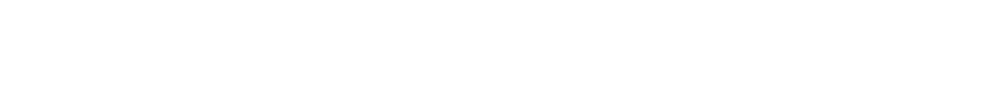

In [8]:
caption = widgets.Latex(value = 'The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                             widgets.IntSlider(description='Slider 2')
l = traitlets.link((sliders1, 'value'), (slider2, 'value'))
display(caption, sliders1, slider2)

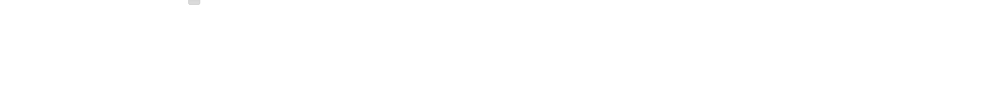

In [9]:
caption = widgets.Latex(value = 'Changes in source values are reflected in target1')
source, target1 = widgets.IntSlider(description='Source'),\
                           widgets.IntSlider(description='Target 1')
dl = traitlets.dlink((source, 'value'), (target1, 'value'))
display(caption, source, target1)

Function `traitlets.link` and `traitlets.dlink` return a `Link` or `DLink` object. The link can be broken by calling the `unlink` method.

In [10]:
l.unlink()
dl.unlink()

## Linking widgets attributes from the client side

When synchronizing traitlets attributes, you may experience a lag because of the latency due to the roundtrip to the server side. You can also directly link widget attributes in the browser using the link widgets, in either a unidirectional or a bidirectional fashion.

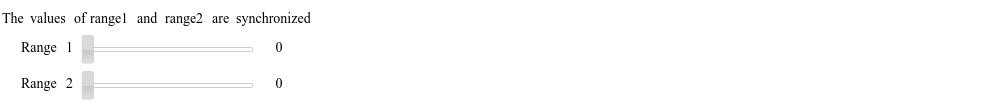

In [11]:
caption = widgets.Latex(value = 'The values of range1 and range2 are synchronized')
range1, range2 = widgets.IntSlider(description='Range 1'),\
                         widgets.IntSlider(description='Range 2')
l = widgets.jslink((range1, 'value'), (range2, 'value'))
display(caption, range1, range2)

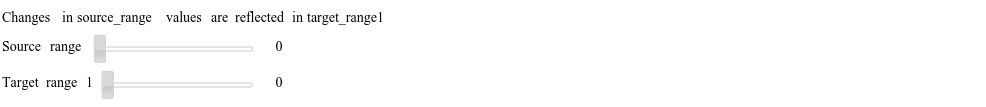

In [12]:
caption = widgets.Latex(value = 'Changes in source_range values are reflected in target_range1')
source_range, target_range1 = widgets.IntSlider(description='Source range'),\
                                             widgets.IntSlider(description='Target range 1')
dl = widgets.jsdlink((source_range, 'value'), (target_range1, 'value'))
display(caption, source_range, target_range1)

Function `widgets.jslink` returns a `Link` widget. The link can be broken by calling the `unlink` method.

In [13]:
l.unlink()
dl.unlink()

[Index](Index.ipynb) - [Back](Widget List.ipynb) - [Next](Widget Styling.ipynb)